##  Image Basic Operations (Part II)

In [2]:
import functools
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
def show(img):
    """Display a single image with matplotlib."""
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return plt.imshow(img)


def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Ref. -> https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1
    """
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

### Gaussian Kernel Effect

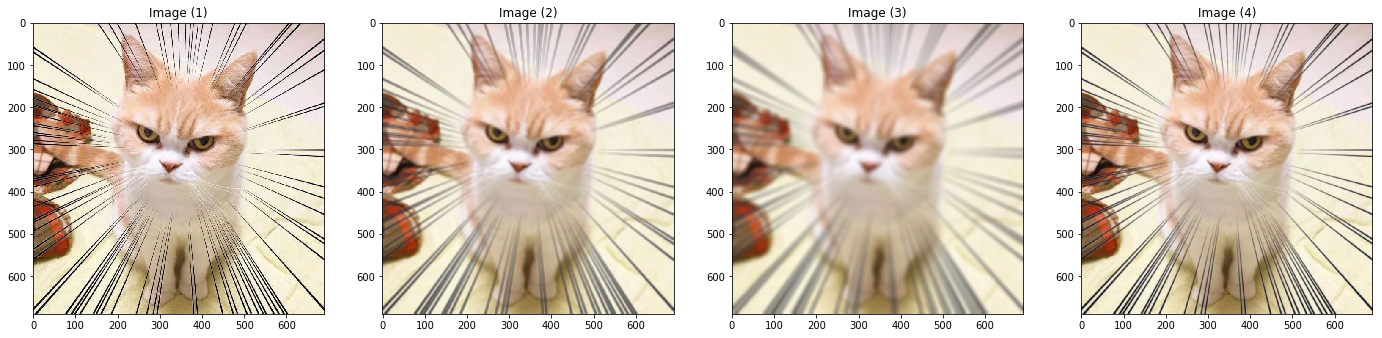

In [4]:
img = cv.imread('data/cat.jpg')
g_img = cv.GaussianBlur(img, (7, 7), 5)
g_bigger_img = cv.GaussianBlur(img, (17, 17), 5)
g_smaller_img = cv.GaussianBlur(img, (7, 7), 1)
show_images([img, g_img, g_bigger_img, g_smaller_img])

In [5]:
kernel = cv.getGaussianKernel(7, 5)
kernel

array([[0.12895603],
       [0.14251846],
       [0.15133131],
       [0.1543884 ],
       [0.15133131],
       [0.14251846],
       [0.12895603]])

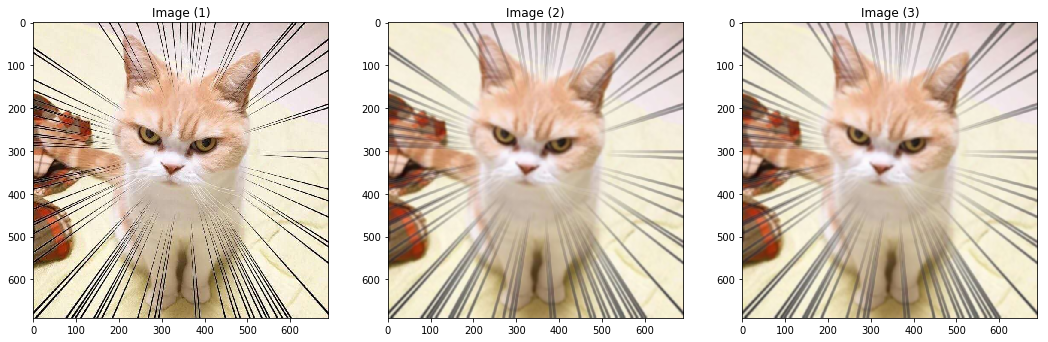

In [6]:
g1_img = cv.GaussianBlur(img, (7, 7), 5)
g2_img = cv.sepFilter2D(img, -1, kernel, kernel)
show_images([img, g1_img, g2_img])

### Applications

#### 2nd derivative: Laplacian

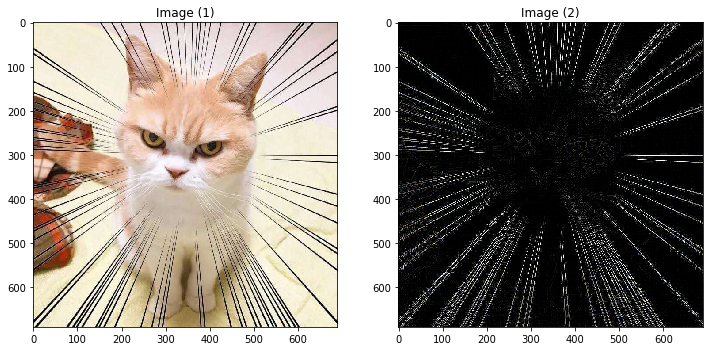

In [7]:
kernel_lap = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
lap_img = cv.filter2D(img, -1, kernel_lap)
show_images([img, lap_img])

####  image sharper = edge + ori

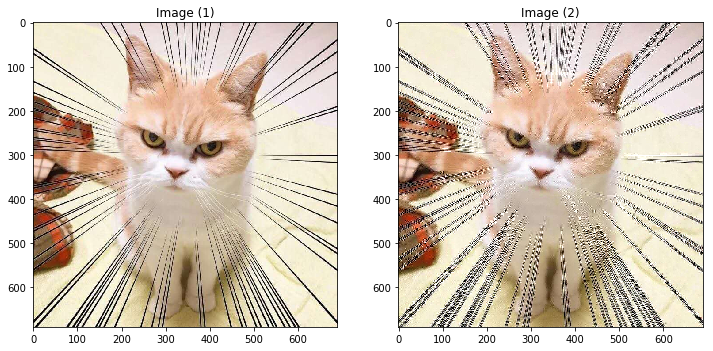

In [8]:
kernel_sharp = np.array([[0, 1, 0], [1, -3, 1], [0, 1, 0]], np.float32) 
lap_img = cv.filter2D(img, -1, kernel_sharp)
show_images([img, lap_img])

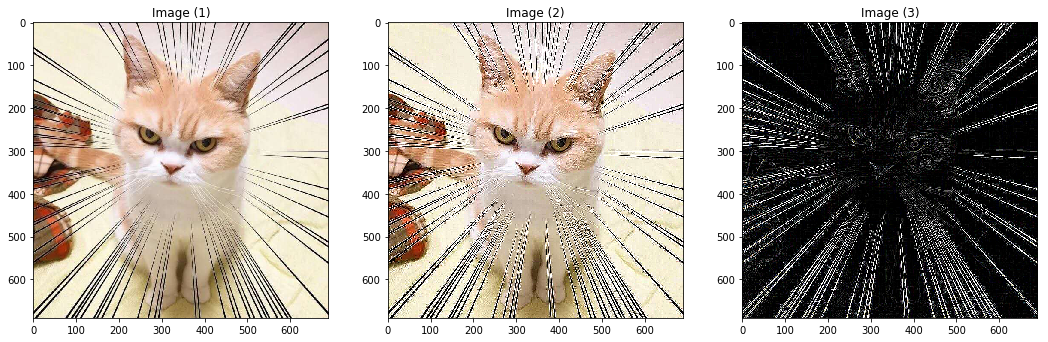

In [9]:
kernel_sharp_1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32) 
kernel_sharp_2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
lap_img_1 = cv.filter2D(img, -1, kernel_sharp_1)
lap_img_2 = cv.filter2D(img, -1, kernel_sharp_2)
show_images([img,lap_img_1, lap_img_2])

#### Edge

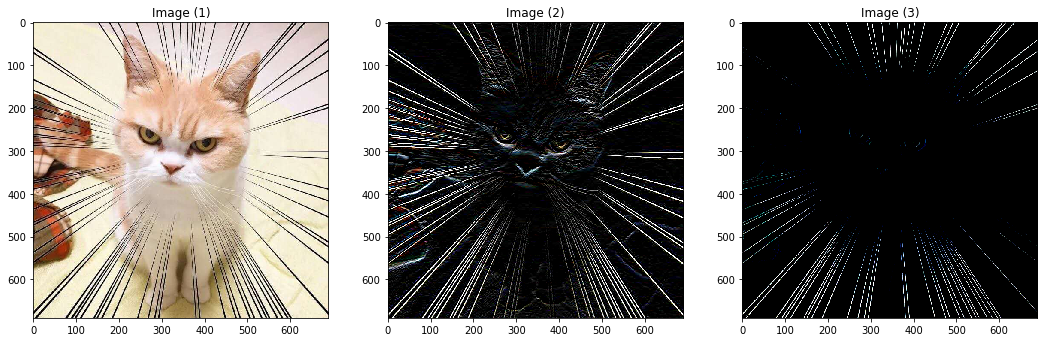

In [10]:
edgex = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
edgey = np.array([[-1, 0, -1], [-2, 0, 2], [-1, 0, 1]], np.float32)
sharp_img_x = cv.filter2D(img, -1, edgex)
sharp_img_y = cv.filter2D(img, -1, edgey)
show_images([img, sharp_img_x, sharp_img_y])

#### Corner

In [11]:
_img = cv.resize(img, (640, 480))
img_gray = np.float32(cv.cvtColor(_img, cv.COLOR_BGR2GRAY))
img_harris = cv.cornerHarris(img_gray, 2, 3, 0.05)
cv.imshow('img_gray', img_gray)
cv.imshow('img_harris', img_harris)
cv.waitKey(5000)
cv.destroyAllWindows()

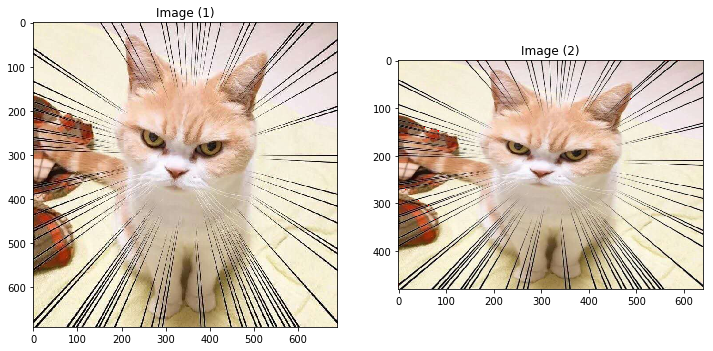

In [12]:
thres = 0.05 * np.max(img_harris)
_img[img_harris>thres] = [0, 0, 255]
show_images([img, _img])

#### SIFT

In [13]:
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(img,None)
kp,des = sift.compute(img,kp)
des.shape

(1432, 128)

In [14]:
img_sift= cv.drawKeypoints(img,kp,outImage=np.array([]), 
                            flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

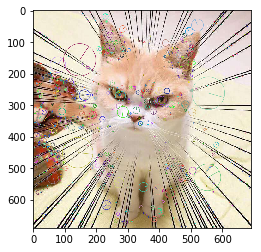

In [15]:
show(img_sift)